In [ ]:
import pandas as pd
path="/content/tennis.csv"
df=pd.read_csv(path)
print(df)

     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no


Manual Decision Tree (ID3):
{'outlook': {'overcast': 'yes',
             'rainy': {'windy': {False: 'yes', True: 'no'}},
             'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}


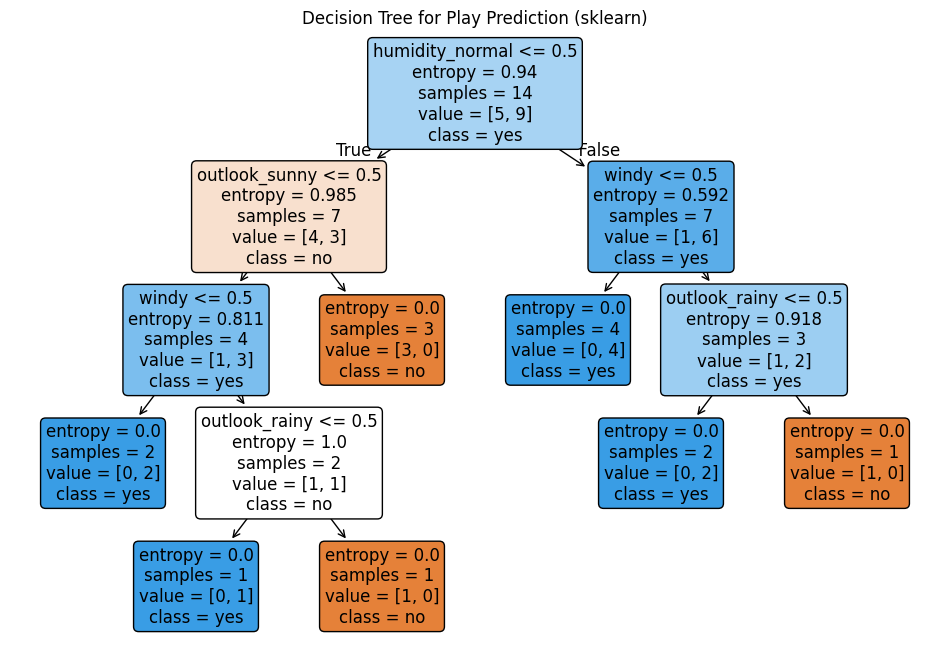

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'temp': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 1: Calculate the entropy of a dataset
def entropy(s):
    value_counts = s.value_counts(normalize=True)
    return -sum(value_counts * np.log2(value_counts))

# Step 2: Calculate Information Gain for a feature
def information_gain(data, feature, target):
    # Entropy of the whole dataset
    total_entropy = entropy(data[target])

    # Calculate the weighted entropy of the feature
    feature_entropy = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        feature_entropy += (len(subset) / len(data)) * entropy(subset[target])

    # Information Gain is the reduction in entropy
    return total_entropy - feature_entropy

# Step 3: ID3 Algorithm to Build the Decision Tree
def id3(data, target, features):
    # If all records have the same label, return that label
    if len(data[target].unique()) == 1:
        return data[target].iloc[0]

    # If no more features to split on, return the majority class
    if len(features) == 0:
        return data[target].mode()[0]

    # Find the feature with the highest information gain
    best_feature = max(features, key=lambda feature: information_gain(data, feature, target))

    # Create the root of the tree with the best feature
    tree = {best_feature: {}}

    # Recurse for each value of the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        # Recurse with the subset, excluding the best feature
        subtree = id3(subset, target, [f for f in features if f != best_feature])
        tree[best_feature][value] = subtree

    return tree

# Step 4: Build the decision tree using ID3
target = 'play'
features = ['outlook', 'temp', 'humidity', 'windy']

decision_tree = id3(df, target, features)

# Print the decision tree
import pprint
print("Manual Decision Tree (ID3):")
pprint.pprint(decision_tree)

# Step 5: Visualize the decision tree using sklearn
# Convert categorical data to numerical using pd.get_dummies
df_encoded = pd.get_dummies(df[['outlook', 'temp', 'humidity', 'windy']], drop_first=True)

# Target variable
target = df['play'].apply(lambda x: 1 if x == 'yes' else 0)

# Initialize and fit the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(df_encoded, target)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=df_encoded.columns, class_names=['no', 'yes'], filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree for Play Prediction (sklearn)')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import math

# Function to calculate entropy
def entropy(y):
    counts = Counter(y)
    probabilities = [count / len(y) for count in counts.values()]
    return -sum(p * math.log2(p) for p in probabilities)

# Function to calculate information gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values = data[feature].unique()
    weighted_entropy = sum((len(data[data[feature] == v]) / len(data)) * entropy(data[data[feature] == v][target]) for v in values)
    return total_entropy - weighted_entropy

# Recursive ID3 algorithm to build the decision tree
def id3(data, features, target):
    # If all target values are the same, return the label
    if len(set(data[target])) == 1:
        return data[target].iloc[0]

    # If no features left, return the most common label
    if len(features) == 0:
        return data[target].mode()[0]

    # Choose the best feature based on information gain
    gains = {feature: information_gain(data, feature, target) for feature in features}
    best_feature = max(gains, key=gains.get)

    # Create tree node
    tree = {best_feature: {}}

    # Split dataset and recurse for each value of the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        remaining_features = [f for f in features if f != best_feature]
        tree[best_feature][value] = id3(subset, remaining_features, target)

    return tree

# Function to print decision tree in a readable format
def print_tree(tree, indent=""):
    if not isinstance(tree, dict):
        print(indent + "→ " + str(tree))
        return

    for key, value in tree.items():
        print(indent + str(key))
        for sub_key, sub_tree in value.items():
            print(indent + " └─ " + str(sub_key))
            print_tree(sub_tree, indent + "    ")

# Load dataset
file_path = '/content/tennis.csv'
data = pd.read_csv(file_path)

# Apply ID3 algorithm
features = list(data.columns[:-1])  # All columns except the target
target = 'play'
decision_tree = id3(data, features, target)

# Print the decision tree
print_tree(decision_tree)


outlook
 └─ sunny
    humidity
     └─ high
        → no
     └─ normal
        → yes
 └─ overcast
    → yes
 └─ rainy
    windy
     └─ False
        → yes
     └─ True
        → no
